In [113]:
import numpy 
print(numpy.__version__)

1.14.6


In [114]:
import pandas
print(pandas.__version__)

0.22.0


In [115]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [116]:
import seaborn
print(seaborn.__version__)

0.7.1


In [117]:
import sklearn
print(sklearn.__version__)

0.19.2


In [0]:
import tensorflow 
print(tensorflow.__version__)

In [39]:
import pandas as pd

# 加载数据集
data = pd.read_csv('housing.csv')

# 获取房屋价格
prices = data['MEDV']
# 获取房屋特征
features = data.drop('MEDV', axis=1)
    
print("波士顿房屋数据有{}条 x {}列。".format(data.shape[0], data.shape[1]))

波士顿房屋数据有489条 x 4列。


In [3]:
# 显示原始数据前5条
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# 显示特征数据前5条
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [40]:
# 输出DataFrame的基本统计数据
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
# 或者自己来写进行统计

import numpy as np

# 计算最低价格
minimum_price = np.min(data["MEDV"])

# 计算最高价格
maximum_price = np.max(data["MEDV"])

# 计算均值
mean_price = np.mean(data["MEDV"])

# 计算中间价格
median_price = np.median(data["MEDV"])

# 计算标准差价格
std_price = np.std(data["MEDV"])

# 打印输出所有计算的价格统计
print("波士顿房价数据的统计：")
print("最低价格： ${}".format(minimum_price)) 
print("最高价格： ${}".format(maximum_price))
print("均价： ${}".format(mean_price))
print("中间价格： ${}".format(median_price))
print("标准差价格： ${}".format(std_price))

波士顿房价数据的统计：
最低价格： $105000.0
最高价格： $1024800.0
均价： $454342.9447852761
中间价格： $438900.0
标准差价格： $165171.13154429474


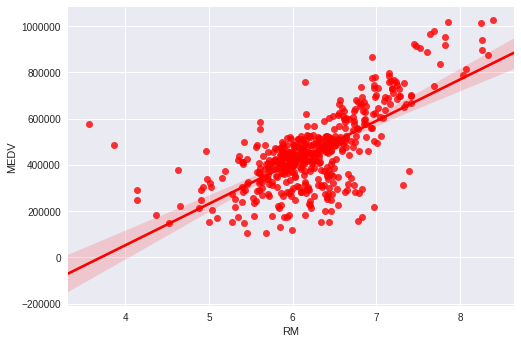

In [7]:
# 分析价格和RM, LSTAT, PTRATIO的相关性

import matplotlib.pyplot as plt
import seaborn as sns

# regplot()函数根据数据绘制线性回归（Linear Regression）模型图
sns.regplot(data['RM'], prices, color='red')
# 显示绘图
plt.show()

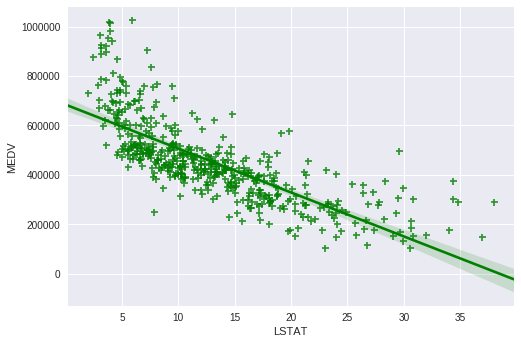

In [8]:
# regplot()函数根据数据绘制线性回归（Linear Regression）模型图
sns.regplot(data['LSTAT'], prices, marker='+', color='green')
# 显示绘图
plt.show()

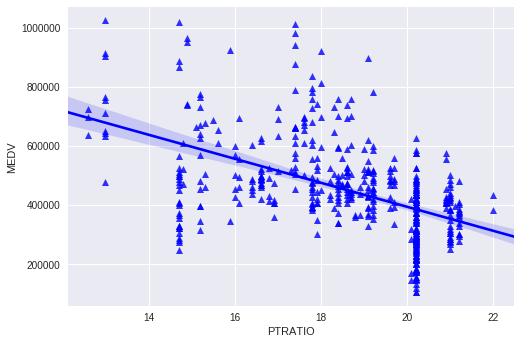

In [9]:
# regplot()函数根据数据绘制线性回归（Linear Regression）模型图
sns.regplot(data['PTRATIO'], prices, marker='^', color='blue')
# 显示绘图
plt.show()

In [0]:
# 导入r2_score
from sklearn.metrics import r2_score

# 定义函数，计算目标值和预测值之间的分值
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [11]:
# 小测验
# 假设：我们有真实的目标值，变量test_y_true表示；预测值，变量test_y_predict表示；
# 现在通过r2_score来计算拟合优度（Goodness of Fit）

test_y_true    = [3, -0.5, 2, 7, 4.2]
test_y_predict = [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(test_y_true, test_y_predict)
print("决定系数，R^2=：{}。".format(score))

决定系数，R^2=：0.9228556485355649。


In [12]:
# 清洗和分割数据
from sklearn.model_selection import train_test_split

# train_test_split()方法用来清洗和分割数据的
# 参数1：特征样本
# 参数2：特征样本对应的目标价格
# 参数3：分配给测试集的大小为0.1，也就是10%的用于测试，90%的用于训练
# 参数4：random_state表示随机数生成器的种子，如果希望第二次调用train_test_split()方法时
#        和第一次调用的结果一致，那么就可以设置一个值，多少多可以，生产环境不要设值
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.1, random_state=50)

print("X_train.shape={}, y_train.shape={}.".format(X_train.shape, y_train.shape))
print("X_test.shape={}, y_test.shape={}.".format(X_test.shape, y_test.shape))

X_train.shape=(440, 3), y_train.shape=(440,).
X_test.shape=(49, 3), y_test.shape=(49,).


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


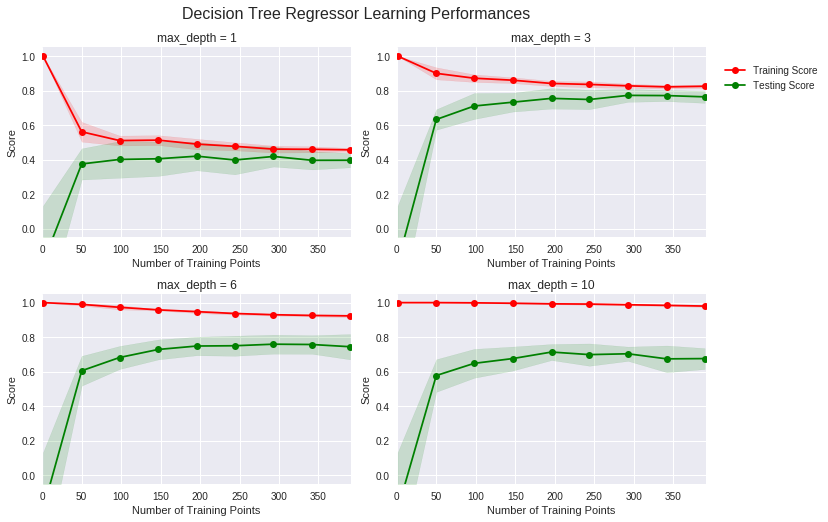

In [13]:
import matplotlib.pyplot as plt

# matplotlib在Jupyter Notebook中的显示时，需要使用这个
%matplotlib inline

from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.tree import DecisionTreeRegressor


# 定义模型的性能对比函数
# 通过不同大小的深度值来创建for循环里的模型，然后以图的形式展现
def ModelLearningGraphMetrics(X, y):
    
    # 清洗和分割数据对象定义，
    # 参数1：n_splits表示重新清洗和分割数据的迭代次数，默认值就是10
    # 参数2：test_size=0.2表示有0.2的数据用于测试，也就是20%的测试数据，80%的训练数据
    # 参数3：random_state表示随机数生成器的种子，如果希望第二次调用ShuffleSplit()方法时
    #        和第一次调用的结果一致，那么就可以设置一个值，多少都可以，生产环境不要设值
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # 生成训练集大小 
    # 函数np.rint()计算数组各元素的四舍五入的值
    # 函数np.linspace(start_i, stop_i, num)表示从起始值到结束值之间，
    #    均匀的间隔返回指定个数的值。
    #    那么这里就是从1开始，结束以X的总行数的80%的数据，每个数据间隔是9
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # 创建一个绘图窗口，大小10x7
    fig = plt.figure(figsize=(10, 7))

    # 根据深度不同，创建不同的模型
    # 这里的深度值就是1，3，6，10这四个
    for k, depth in enumerate([1,3,6,10]):
        
        # 根据深度(max_depth)值来创建决策树回归器
        regressor = DecisionTreeRegressor(max_depth=depth)

        # 计算训练集和测试集的分值通过学习曲线函数
        # 参数1：评估器，这里就是决策树回归器
        # 参数2：特征样本
        # 参数3：目标标签
        # 参数4：训练样本的个数，这是用来生成学习曲线的
        # 参数5：交叉验证生成器，或可迭代对象
        # 参数6：评分器，是一个可调用对象
        sizes, train_scores, test_scores = learning_curve(
           regressor, X, y, train_sizes=train_sizes, cv=cv, scoring='r2')
        
        # 计算训练集分值和测试集分值的标准差
        train_std = np.std(train_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        # 计算训练集分值和测试集分值的均值
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
 
        # 根据学习曲线值来绘制图
        ax = fig.add_subplot(2, 2, k+1)
        # 绘制第一条训练得分线，plot()方法：
        #  参数1：X轴方向的值；
        #  参数2：y轴方向的值；
        #  参数3：绘制出来的线的样式风格，比如这里的"o"表示一个圆圈标记，而"-"表示实线
        #  参数4：绘制的线的颜色
        #  参数5：图例上的标题
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        # 绘制第二条测试得分线
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        # fill_between()方法表示在训练线的曲线中描边
        #  参数1：X轴方向的值
        #  参数2：y轴方向的第一条曲线
        #  参数3：y轴方向的第二条曲线
        #  参数4：设置曲线值
        #  参数5：设置线条的颜色
        ax.fill_between(sizes, train_mean - train_std, 
            train_mean + train_std, alpha=0.15, color='r')
        # fill_between()方法表示在测试线的曲线中描边
        ax.fill_between(sizes, test_mean - test_std, 
            test_mean + test_std, alpha=0.15, color='g')
        
        # 在绘图的窗口上添加标题
        ax.set_title('max_depth = {}'.format(depth))
        # 设置X轴方向的标题
        ax.set_xlabel('Number of Training Points')
        # 设置y轴方向的标题
        ax.set_ylabel('Score')
        # 设置X轴方向的最低值，和最高值
        ax.set_xlim([0, X.shape[0]*0.8])
        # 设置y轴方向的最低值，和最高值
        ax.set_ylim([-0.05, 1.05])
    
    # 添加图例
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad=0.)
    # 添加图像的中间上方的标题
    fig.suptitle('Decision Tree Regressor Learning Performances', 
                 fontsize=16, y=1.03)
    # 自动调整subplot符合图的区域的参数的布局
    fig.tight_layout()
    # 显示绘图
    fig.show()
    
ModelLearningGraphMetrics(features, prices)

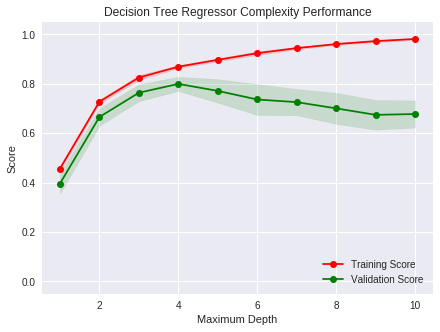

In [14]:
from sklearn.model_selection import ShuffleSplit, validation_curve

# 定义模型在复杂度高的情况下性能函数
# 随着模型复杂度增加时计算它的性能表现
def ModelComplexityPerformanceMetrics(X, y):
    
    # 清洗和分割数据对象定义，
    # 参数1：n_splits表示重新清洗和分割数据的迭代次数，默认值就是10
    # 参数2：test_size=0.2表示有0.2的数据用于测试，也就是20%的测试数据，80%的训练数据
    # 参数3：random_state表示随机数生成器的种子，如果希望第二次调用ShuffleSplit()方法时
    #        和第一次调用的结果一致，那么就可以设置一个值，多少都可以，生产环境不要设值
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # 定义1到10个深度（max_depth）的参数
    max_depth = np.arange(1,11)

    # 通过不同的max_depth的参数值来计算训练集和测试集的分值
    # 参数1：评估器，这里是决策树回归器
    # 参数2：特征样本，房屋特征
    # 参数3：目标标签，房屋价格
    # 参数4：传入的深度参数名称
    # 参数5：传入的深度参数范围值
    # 参数6：交叉验证生成器，或可迭代对象
    # 参数7：评分器，是一个可调用对象
    train_scores, test_scores = \
    validation_curve(DecisionTreeRegressor(), X, y, param_name="max_depth", 
                     param_range=max_depth, cv=cv, scoring='r2')

    # 计算训练集得分和测试集得分的均值
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    # 计算训练集得分和测试集得分的标准差
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 绘制验证分值的曲线图
    # figsize表示要绘制的图像窗口大小
    plt.figure(figsize=(7, 5))
    # 给绘制的图像窗口上添加一个标题
    plt.title('Decision Tree Regressor Complexity Performance')
    # 绘制第一条训练得分线，plot()方法：
    #  参数1：X轴方向的值；
    #  参数2：y轴方向的值；
    #  参数3：绘制出来的线的样式风格，比如这里的"o"表示一个圆圈标记，而"-"表示实线
    #  参数4：绘制的线的颜色
    #  参数5：图例上的标题
    plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score')
    # 绘制第二条验证得分线
    plt.plot(max_depth, test_mean, 'o-', color='g', label='Validation Score')
    # fill_between()方法表示在两个曲线中填充，第一条是训练得分线，第二条曲线是测试得分线
    #  参数1：X轴方向的值
    #  参数2：y轴方向的第一条曲线
    #  参数3：y轴方向的第二条曲线
    #  参数4：设置曲线值
    #  参数5：设置线条的颜色
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha=0.15, color='g')
    
    # 图上加标题注解
    # 添加图例
    plt.legend(loc='lower right')
    # 添加X轴方向的标题
    plt.xlabel('Maximum Depth')
    # 添加y轴方向的标题
    plt.ylabel('Score')
    # 设置y轴方向的最低值，和最高值
    plt.ylim([-0.05,1.05])
    # 显示绘图
    plt.show()
    
ModelComplexityPerformanceMetrics(features, prices)

In [15]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

# 定义网格搜索最佳模型函数
def gridSearchVC_fit_model(X, y):
    
    # 清洗和分割数据对象定义，
    # 参数一：n_splits表示重新清洗和分割数据的迭代次数，默认值就是10
    # 参数二：test_size=0.2表示有0.2的数据用于测试，也就是20%的测试数据，80%的训练数据
    # 参数三：random_state表示随机数生成器的种子，如果希望第二次调用ShuffleSplit()方法时
    #        和第一次调用的结果一致，那么就可以设置一个值，多少都可以，生产环境不要设值
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # 创建决策树回归器对象
    regressor = DecisionTreeRegressor(random_state=0)

    # 创建一个字典，表示max_depth的值是从1到10
    # 注意：如果是Python2的话，这个list()函数调用去掉
    params = { "max_depth" : list(range(1, 10)) }

    # 通过make_scorer()函数将上面定义的performance_metric()函数转换成计算分值函数
    scoring_fnc = make_scorer(score_func=performance_metric)

    # 创建网格搜索对象
    # 参数一：评估器，就是回归器，这里表示的是决策树回归器
    # 参数二：网格搜索参数
    # 参数三：计算分值函数
    # 参数四：cv（Cross-Validation）交叉验证，传入交叉验证生成器，或者可迭代对象
    grid = GridSearchCV(estimator=regressor, param_grid=params, 
                        scoring=scoring_fnc, cv=cv)

    # 根据数据计算/训练适合网格搜索对象的最佳模型
    grid = grid.fit(X, y)

    # 返回计算得到的最佳模型
    return grid.best_estimator_
  
# 网格搜索函数得到最佳模型
reg = gridSearchVC_fit_model(X_train, y_train)

print("参数max_depth={}是最佳模型。".format(reg.get_params()['max_depth']))

参数max_depth=4是最佳模型。


In [16]:
# 小测验

# 假设有以下三个客户的数据，分别是
client_data = [[3, 30, 10], # 客户1
               [7, 20, 19], # 客户2
               [9, 2, 9]]   # 客户3

# 尝试预测
for i, price in enumerate(reg.predict(client_data)):
    print("预测客户{}的销售价格是${:,.2f}".format(i+1, price))

预测客户1的销售价格是$320,425.00
预测客户2的销售价格是$410,658.62
预测客户3的销售价格是$938,053.85


In [17]:
# 预测波士顿房屋价格
def PredictHousingPrice(X, y, fitter):
    
    # 迭代10次
    epochs = 10
    
    # 存储预测的价格
    y_predict_test_price = None
    
    # 分割训练集和测试集数据
    X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.2, random_state=0)

    # 迭代训练
    for epoch_i in range(epochs):
      
        # 根据数据训练模型，并返回最佳模型
        reg = fitter(X_train, y_train)
        
        # 预测测试数据
        predicted_price = reg.predict(X_test)
        
        y_predict_test_price = predicted_price
        
        print("迭代第{}次。".format(epoch_i+1))
       
    return y_test, y_predict_test_price
    
y_true_price, y_predict_price = \
PredictHousingPrice(features, prices, gridSearchVC_fit_model)

迭代第1次。
迭代第2次。
迭代第3次。
迭代第4次。
迭代第5次。
迭代第6次。
迭代第7次。
迭代第8次。
迭代第9次。
迭代第10次。


In [19]:
# 查看真实的前5个房价
pd.Series(y_true_price).reset_index().drop('index', axis=1).head()

,MEDV
0,417900.0
1,632100.0
2,281400.0
3,577500.0
4,474600.0


In [20]:
# 查看预测的前5个房价
pd.Series(y_predict_price).head()

0    436065.000000
1    643455.555556
2    324240.000000
3    248675.000000
4    501352.173913
dtype: float64

In [0]:
# 显示真实的房价和预测房价对比图
def plotVersusFigure(y_true_price, y_predict_price):
    # 创建一个10x7英寸的窗口大小
    plt.figure(figsize=(10, 7))

    # 绘制的图1是真实的房价
    X_show = np.rint(np.linspace(1, 
                                 np.max(y_true_price), 
                                 len(y_true_price))
                    ).astype(int)
    # 绘制图1线，plot()方法：
    #  参数1：X轴方向的值，真实房价最低价和最高价
    #  参数2：y轴方向的值，真实房价的值
    #  参数3：绘制出来的线的样式风格，比如这里的"o"表示一个圆圈标记，而"-"表示实线
    #  参数4：绘制的线的颜色，这里是青色
    plt.plot(X_show, y_true_price, 'o-', color='c')

    # 绘制的图2是预测的房价，叠加在图1上
    X_show_predicted = np.rint(np.linspace(1, 
                                           np.max(y_predict_price), 
                                           len(y_predict_price))
                              ).astype(int)
    # 绘制图2线，plot()方法：
    #  参数1：X轴方向的值，预测房价最低价和最高价
    #  参数2：y轴方向的值，预测房价的值
    #  参数3：绘制出来的线的样式风格，比如这里的"o"表示一个圆圈标记，而"-"表示实线
    #  参数4：绘制的线的颜色，这里是洋红色
    plt.plot(X_show_predicted, y_predict_price, 'o-', color='m')

    # 添加标题
    plt.title('Housing Prices Prediction')
    # 添加图例
    plt.legend(loc='lower right', labels=["True Prices", "Predicted Prices"])
    # 添加X轴的标题
    plt.xlabel("House's Price Tendency By Array")
    # 添加y轴的标题
    plt.ylabel("House's Price")
    # 显示绘制
    plt.show()

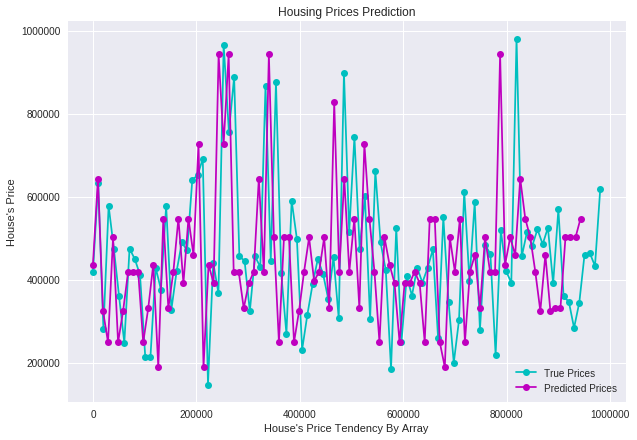

In [22]:
# 波士顿房屋价格对比图
plotVersusFigure(y_true_price, y_predict_price)

In [23]:
# 根据北京的房价数据来预测
  
df = pd.read_csv('bj_housing.csv')
df.describe()

,Area,Value,Room,Living,School,Year,Floor
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,92.003900,342.076208,2.156216,1.277628,0.583958,1998.235524,13.326433
std,46.263242,259.406028,0.791407,0.524963,0.492925,13.126885,7.953371
min,14.000000,66.000000,1.000000,0.000000,0.000000,1014.000000,0.000000
25%,61.000000,205.000000,2.000000,1.000000,0.000000,1993.500000,6.000000
50%,83.000000,280.000000,2.000000,1.000000,1.000000,2000.000000,12.000000
75%,110.000000,395.000000,3.000000,2.000000,1.000000,2004.000000,19.000000
max,1124.000000,7450.000000,9.000000,4.000000,1.000000,2015.000000,91.000000


In [24]:
bj_prices = df['Value']
bj_features = df.drop('Value', axis=1)
bj_features.head()

,Area,Room,Living,School,Year,Floor
0,128,3,1,1,2004,21
1,68,1,2,1,2000,6
2,125,3,2,0,2003,5
3,129,2,2,0,2005,16
4,118,3,2,0,2003,6


In [25]:
y_true_bj_price, y_predict_bj_price = \
PredictHousingPrice(bj_features, bj_prices, gridSearchVC_fit_model)

迭代第1次。
迭代第2次。
迭代第3次。
迭代第4次。
迭代第5次。
迭代第6次。
迭代第7次。
迭代第8次。
迭代第9次。
迭代第10次。


In [26]:
y_true_bj_price.reset_index().drop('index', axis=1).head()

,Value
0,860
1,155
2,140
3,345
4,162


In [27]:
pd.Series(y_predict_bj_price).head()

0    845.000000
1    234.398734
2    122.322581
3    261.000000
4    250.324503
dtype: float64

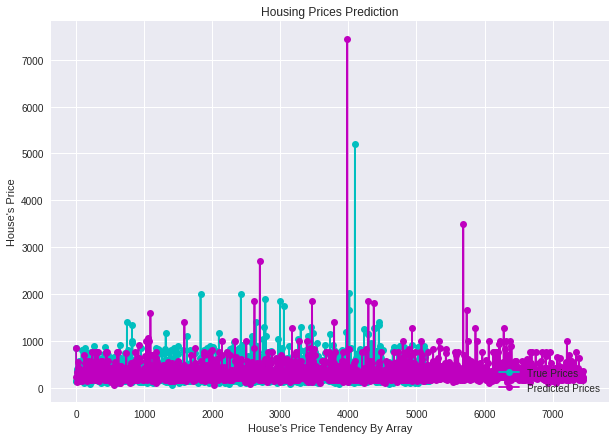

In [28]:
# 北京房屋价格对比图
plotVersusFigure(y_true_bj_price, y_predict_bj_price)

In [1]:
# 使用Keras来预测波士顿的房价预测

import tensorflow as tf
from tensorflow import keras
import numpy as np

# 加载波士顿的房价数据
(train_data, train_labels), (test_data, test_labels) = \
keras.datasets.boston_housing.load_data()

# 清洗训练集数据
# np.random.random()表示在0.0到1.0之间返回指定个数的随机浮点数
# np.argsort()表示返回对数组进行排序的索引
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# 归一化处理数据
# 对不同的范围和比例进行归一化处理，并且每个元素都要减去均值除以标准差
# 模型虽然在没有特征归一化时也可以得到收敛，但是这会让训练更加困难，
# 而且会是结果模型很依赖于训练数据
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print("train_data.shape: {}, train_labels.shape: {}."
      .format(train_data.shape, train_labels.shape)) 
print("test_data.shape: {}, test_labels.shape: {}."
      .format(test_data.shape, test_labels.shape)) 

57344/57026 [==============================] - 0s 0us/step
train_data.shape: (404, 13), train_labels.shape: (404,).
test_data.shape: (102, 13), test_labels.shape: (102,).


In [2]:
# 创建模型函数
def build_model():
    model = keras.Sequential([
      keras.layers.Dense(64, activation=tf.nn.relu,
                         input_shape=(train_data.shape[1],)),
      keras.layers.Dense(64, activation=tf.nn.relu),
      keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

model = build_model()
# 查看模型的架构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 自定义一个回调类，在每次epoch（代）结束时都会调用该函数
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# 训练模型
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

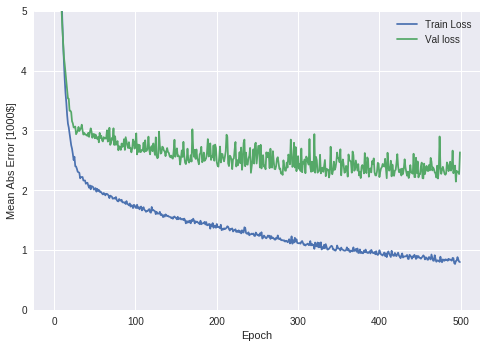

In [4]:
import matplotlib.pyplot as plt

# 绘制图来显示训练的误差历史
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
             label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
             label='Val loss')
    plt.legend()
    plt.ylim([0, 5])
    plt.show()

plot_history(history)


....................................................................................................
....................................................................................

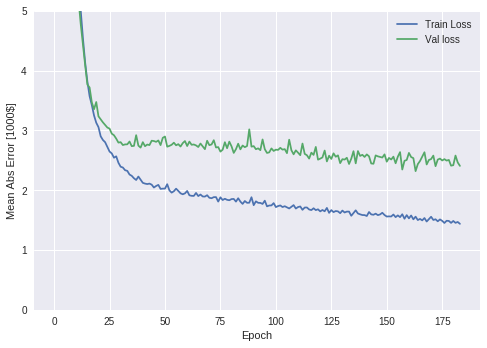

In [5]:
# 重新构建模型
model = build_model()

# 对验证损失值设置早期停止，如果20次的迭代依旧没有提升，则自动停止训练
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# 重新训练模型
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

# 打印历史记录
plot_history(history)

In [6]:
# 评估模型
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2930.86


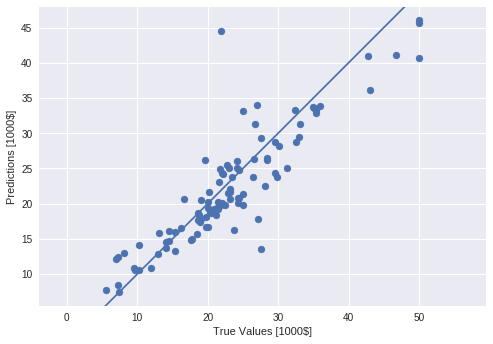

In [7]:
# 预测模型
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

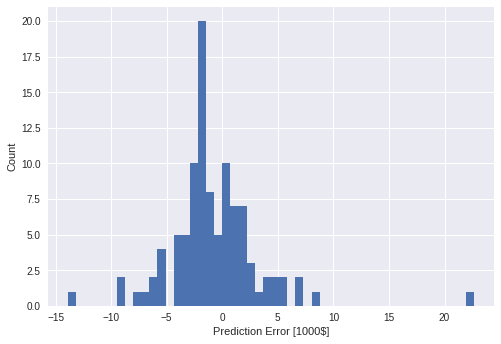

In [8]:
# 查看预测值与真实的值得误差
error = test_predictions - test_labels
plt.hist(error, bins=50)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count")
plt.show()

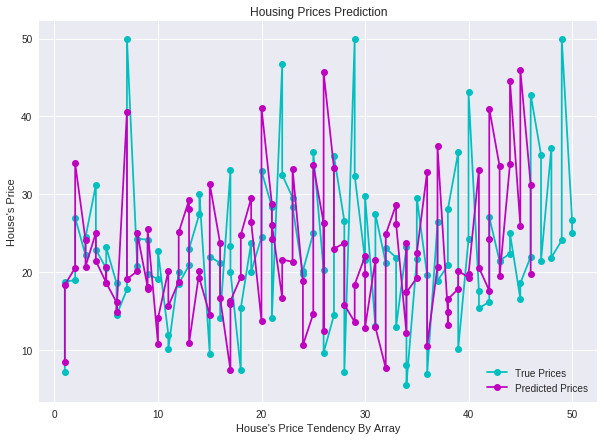

In [11]:
# 对比真实的值和预测的值的图
plotVersusFigure(test_labels, test_predictions)